<a href="https://colab.research.google.com/github/jpthirumalai/aiml/blob/master/Project_Digital_Classification_SVHN_Thiru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
projfolder = '/content/drive/My Drive/AIML/AI/NNProject/'

In [3]:
import tensorflow.compat.v1 as tf
#tf.reset_default_graph()
#tf.compat.v1.disable_eager_execution()
import h5py
file=projfolder+'SVHN_single_grey1.h5'
f= h5py.File(file,'r')

##Step 1: Load Train and Test data from .h5 file

In [4]:
#Load the X_train, X_test, Y_train, Y_test, X_val and Y_val datasets from the h5py file	2
list(f.keys())


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [5]:
for key in list(f.keys()):
  print('Shape of '+key+':'+str(f[key].shape))

Shape of X_test:(18000, 32, 32)
Shape of X_train:(42000, 32, 32)
Shape of X_val:(60000, 32, 32)
Shape of y_test:(18000,)
Shape of y_train:(42000,)
Shape of y_val:(60000,)


In [0]:
X_test = f['X_test']
X_train = f['X_train']
X_val = f['X_val']
y_test = f['y_test']
y_train = f['y_train']
y_train_no_1hot = y_train
y_val = f['y_val']

## Step 2: Flatten the images for Keras

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# through thies error AttributeError: 'Dataset' object has no attribute 'reshape', need to convert to numpy array
X_test = np.array(X_test)
print('before converting',X_test.shape)
X_test = X_test.reshape(18000,1024)
print('after converting Test Size',X_test.shape)
#similarly convert required dataset to numpy array and reshape 32X32 into 1024
X_train = np.array(X_train).reshape(42000,1024)

print('after converting Train Size',X_train.shape)

before converting (18000, 32, 32)
after converting Test Size (18000, 1024)
after converting Train Size (42000, 1024)


### Verifying the image

Label:  [143.1893 141.7164 129.8146 ...  67.7635  68.3613  73.3608]


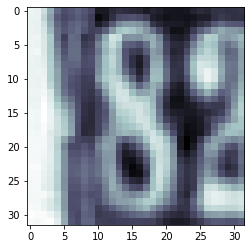

In [8]:

# testing the image in the index 105
print('Label: ', X_train[105])
plt.imshow(X_train[105].reshape(32,32), cmap=plt.cm.bone);

In [9]:
#printing the value in y_train same index number 105
print('Label at 10 : ', y_train[105])

Label at 10 :  8


## Step 3: Normalize the inputs from 0 to 1

In [10]:
#Normalize the inputs for X_train, X_test and X_val	1
X_train[0:2]

array([[33.0704, 30.2601, 26.852 , ..., 49.6682, 50.853 , 53.0377],
       [86.9591, 87.0685, 88.3735, ..., 75.2206, 76.6396, 79.2865]],
      dtype=float32)

In [11]:
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train[0:2]

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
        0.20799099],
       [0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
        0.31092745]], dtype=float32)

##Step 4: Conert the class matrices / Label into one hot vectors

In [12]:
#Convert the class matrices Y_train, Y_test and Y_val into one hot vectors	1
print('Before one hot conversion :',y_train[0:5])
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)
print('After one hot conversion :',y_train[0:5])

Before one hot conversion : [2 6 7 4 4]
After one hot conversion : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Step 5: Print train and Test val shapes

In [13]:
#Print the train, test and val shapes	2
print('Shape of Training set Train:', X_train.shape, 'Test:', X_test.shape )

Shape of Training set Train: (42000, 1024) Test: (18000, 1024)


##Step 6: Visualize the first 10 images in X_train and the corresponding Y_train labels

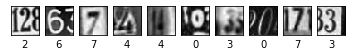

In [14]:
#Visualize the first 10 images in X_train and the corresponding Y_train labels	2
#plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(32,32), cmap=plt.cm.binary)
    plt.xlabel(y_train_no_1hot[i])
plt.show()

In [15]:
print(y_train[0:10])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


##Step 7: In the train and test loop, define the hyperparameters for the model

In [0]:
#In the train and test loop, define the hyperparameters for the model	4
learning_rate = 0.001
activation = 'relu'
optimizer='sgd'
loss='categorical_crossentropy'
epochs=10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

##Step 8: Create a Sequential model in Keras

In [17]:
#Create a Sequential model in Keras with input layer with the correct input shape, Hidden Layers, Output Layers and the activation functions	8
#Initialize sequential model
model = tf.keras.models.Sequential()
#Reshape data from 2D to 1D ->28*28 to 784
model.add(tf.keras.layers.Reshape((1024,),input_shape=(1024,)))
#Add Dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(100,activation = 'relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


##Step 9: Define the optimizer to be used in this model

In [0]:
#Define the optimizer to be used in this model	2
sgd_optimizer = tf.keras.optimizers.SGD(lr=learning_rate)

##Step 10: Compile the model with the corresponding Loss and metrics to monitor

In [0]:
#Compile the model with the corresponding Loss and metrics to monitor	2
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

##Step 12: Fit the model and use model.Evaluate to return the score

In [20]:
#Fit the model and use model.evaluate() to return the score	1
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 75us/sample - loss: 2.3036 - acc: 0.0995 - val_loss: 2.3032 - val_acc: 0.0949
Epoch 2/10
42000/42000 [==============================] - 3s 71us/sample - loss: 2.2194 - acc: 0.1525 - val_loss: 1.9344 - val_acc: 0.2842
Epoch 3/10
42000/42000 [==============================] - 3s 70us/sample - loss: 1.8278 - acc: 0.3460 - val_loss: 1.7263 - val_acc: 0.3781
Epoch 4/10
42000/42000 [==============================] - 3s 69us/sample - loss: 1.5306 - acc: 0.4760 - val_loss: 1.4816 - val_acc: 0.4936
Epoch 5/10
42000/42000 [==============================] - 3s 71us/sample - loss: 1.3585 - acc: 0.5474 - val_loss: 1.3816 - val_acc: 0.5359
Epoch 6/10
42000/42000 [==============================] - 3s 70us/sample - loss: 1.2409 - acc: 0.5945 - val_loss: 1.3889 - val_acc: 0.5518
Epoch 7/10
42000/42000 [==============================] - 3s 71us/sample - loss: 1.1547 - acc: 0.6298 - val_loss: 1.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               102500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 123,820
Trainable params: 123,820
Non-trainable params: 0
__________________________________________________

In [22]:
score = model.evaluate(X_test, y_test, batch_size=16)
print(score)

18000/18000 [==============================] - 1s 43us/sample - loss: 0.9828 - acc: 0.6863
[0.9828491798904208, 0.6862778]


#Step 13: Disable Regularization by setting appropriate value for Lambda and check the loss of the NN

In [23]:
#Disable Regularization by setting appropriate value for Lambda and check the loss of the NN	2
#Normalize the data
# example of l2 on a dense layer
from keras.layers import Dense
from keras.regularizers import l2

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(200,activation = 'relu'))
model2.add(tf.keras.layers.Dense(200, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(tf.keras.layers.Dense(100,activation = 'relu'))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))
model2.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model2.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Using TensorFlow backend.


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 87us/sample - loss: 2.4654 - acc: 0.2491 - val_loss: 1.8804 - val_acc: 0.3772
Epoch 2/10
42000/42000 [==============================] - 3s 83us/sample - loss: 1.6684 - acc: 0.4622 - val_loss: 1.4779 - val_acc: 0.5076
Epoch 3/10
42000/42000 [==============================] - 4s 84us/sample - loss: 1.4707 - acc: 0.5459 - val_loss: 1.3682 - val_acc: 0.6009
Epoch 4/10
42000/42000 [==============================] - 4s 84us/sample - loss: 1.3441 - acc: 0.5920 - val_loss: 1.4708 - val_acc: 0.5552
Epoch 5/10
42000/42000 [==============================] - 3s 83us/sample - loss: 1.2686 - acc: 0.6198 - val_loss: 1.2704 - val_acc: 0.6229
Epoch 6/10
42000/42000 [==============================] - 4s 83us/sample - loss: 1.2362 - acc: 0.6346 - val_loss: 1.1278 - val_acc: 0.6712
Epoch 7/10
42000/42000 [==============================] - 4s 84us/sample - loss: 1.1925 - acc: 0.6500 - val_loss: 1.

In [0]:
#Seeing the accuracy increases from 13% to 65% - try increasing the epochs and see it the max accuracy
#model2.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=32)

##Step 14: Increase the Regularization parameter (Lambda) and check how the loss is for the NN. Record findings

In [25]:
#Increase the Regularization parameter (Lambda) and check how the loss is for the NN. Record findings	2
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(200,activation = 'relu'))
model3.add(tf.keras.layers.Dense(200, kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1)))
model3.add(tf.keras.layers.Dense(100,activation = 'relu'))
model3.add(tf.keras.layers.Dense(10,activation='softmax'))
model3.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model3.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 86us/sample - loss: 2.6628 - acc: 0.1366 - val_loss: 2.2796 - val_acc: 0.1935
Epoch 2/10
42000/42000 [==============================] - 3s 83us/sample - loss: 2.1071 - acc: 0.2277 - val_loss: 2.0885 - val_acc: 0.2178
Epoch 3/10
42000/42000 [==============================] - 4s 86us/sample - loss: 2.0366 - acc: 0.2590 - val_loss: 1.9041 - val_acc: 0.3219
Epoch 4/10
42000/42000 [==============================] - 4s 85us/sample - loss: 1.9499 - acc: 0.3091 - val_loss: 2.2954 - val_acc: 0.2317
Epoch 5/10
42000/42000 [==============================] - 4s 85us/sample - loss: 1.8727 - acc: 0.3427 - val_loss: 2.0901 - val_acc: 0.3016
Epoch 6/10
42000/42000 [==============================] - 4s 85us/sample - loss: 1.8256 - acc: 0.3713 - val_loss: 1.8218 - val_acc: 0.3574
Epoch 7/10
42000/42000 [==============================] - 4s 85us/sample - loss: 1.7818 - acc: 0.3962 - val_loss: 1.

###Using BatchNormalization layer

In [26]:
model3_bn = tf.keras.models.Sequential()
model3_bn.add(tf.keras.layers.Dense(200,activation = 'relu'))
model3_bn.add(tf.keras.layers.BatchNormalization())
model3_bn.add(tf.keras.layers.Dense(100,activation='relu'))
model3_bn.add(tf.keras.layers.Dense(10,activation='softmax'))
model3_bn.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model3_bn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 95us/sample - loss: 1.7334 - acc: 0.4050 - val_loss: 2.4160 - val_acc: 0.2851
Epoch 2/10
42000/42000 [==============================] - 4s 94us/sample - loss: 1.3210 - acc: 0.5703 - val_loss: 1.9857 - val_acc: 0.4048
Epoch 3/10
42000/42000 [==============================] - 4s 95us/sample - loss: 1.2029 - acc: 0.6140 - val_loss: 1.2896 - val_acc: 0.5803
Epoch 4/10
42000/42000 [==============================] - 4s 95us/sample - loss: 1.1904 - acc: 0.6195 - val_loss: 1.1987 - val_acc: 0.6206
Epoch 5/10
42000/42000 [==============================] - 4s 96us/sample - loss: 1.1683 - acc: 0.6284 - val_loss: 1.8031 - val_acc: 0.4739
Epoch 6/10
42000/42000 [==============================] - 4s 101us/sample - loss: 1.1501 - acc: 0.6336 - val_loss: 1.9294 - val_acc: 0.4099
Epoch 7/10
42000/42000 [==============================] - 4s 101us/sample - loss: 1.1456 - acc: 0.6336 - val_loss: 

Increasing the lambda from 0.01 to 0.1 the loss is reducing

#Step 15: Network overfit with a small subset of the dataset. Check if the network will overfit when you use no regularization and the loss is very small and accuracy is 100%


In [27]:
#Network overfit with a small subset of the dataset. Check if the network will overfit when you use no regularization and the loss is very small and accuracy is 100%.	2
X_train_subset = X_train[0:4200]
X_test_subset = X_test[0:4200]
y_train_subset = y_train[0:4200]
y_test_subset = y_test[0:4200]
small_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
small_model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
small_model.fit(X_train_subset,y_train_subset,epochs=10,validation_data=(X_test_subset,y_test_subset),batch_size=32)

Train on 4200 samples, validate on 4200 samples
Epoch 1/10
4200/4200 [==============================] - 0s 96us/sample - loss: 2.3229 - acc: 0.1033 - val_loss: 2.3039 - val_acc: 0.1093
Epoch 2/10
4200/4200 [==============================] - 0s 68us/sample - loss: 2.3078 - acc: 0.1040 - val_loss: 2.3049 - val_acc: 0.1095
Epoch 3/10
4200/4200 [==============================] - 0s 67us/sample - loss: 2.2937 - acc: 0.1264 - val_loss: 2.2754 - val_acc: 0.1257
Epoch 4/10
4200/4200 [==============================] - 0s 70us/sample - loss: 2.2772 - acc: 0.1360 - val_loss: 2.2813 - val_acc: 0.1533
Epoch 5/10
4200/4200 [==============================] - 0s 69us/sample - loss: 2.2406 - acc: 0.1498 - val_loss: 2.3182 - val_acc: 0.1007
Epoch 6/10
4200/4200 [==============================] - 0s 70us/sample - loss: 2.1807 - acc: 0.1855 - val_loss: 2.2166 - val_acc: 0.1800
Epoch 7/10
4200/4200 [==============================] - 0s 72us/sample - loss: 2.1156 - acc: 0.2193 - val_loss: 2.2894 - val_acc: 

With small model and reduced 10% of the dataset we are able to get 100% accuracy - which is OVERFITTING

##Step 16: Load the original dataset with all the images and prepare the data for modelling


In [28]:
#Load the original dataset with all the images and prepare the data for modelling	4
X_test = f['X_test']
X_train = f['X_train']
X_val = f['X_val']
y_test = f['y_test']
y_train = f['y_train']
y_val = f['y_val']
X_test = np.array(X_test)
X_test = X_test.reshape(18000,1024)
#similarly convert required dataset to numpy array and reshape 32X32 into 1024
X_train = np.array(X_train).reshape(42000,1024)
#Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0
#one hot encoding labels
print('Before one hot conversion :',y_train[0:5])
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)
print('After one hot conversion :',y_train[0:5])

Before one hot conversion : [2 6 7 4 4]
After one hot conversion : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


##Step 17: Start with a small Regularization. Keep adjusting the learning rate to check the loss. Record findings


In [29]:
#Start with a small Regularization. Keep adjusting the learning rate to check the loss. Record findings	4
model5= tf.keras.models.Sequential()
model5.add(tf.keras.layers.Dense(200,activation = 'relu'))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.Dense(100,activation='relu'))
model5.add(tf.keras.layers.Dense(10,activation='softmax'))
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.5)
model5.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model5.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 98us/sample - loss: 1.7364 - acc: 0.4008 - val_loss: 2.2705 - val_acc: 0.3231
Epoch 2/10
42000/42000 [==============================] - 4s 90us/sample - loss: 1.4233 - acc: 0.5337 - val_loss: 1.5119 - val_acc: 0.4994
Epoch 3/10
42000/42000 [==============================] - 4s 89us/sample - loss: 1.3143 - acc: 0.5774 - val_loss: 2.1539 - val_acc: 0.3958
Epoch 4/10
42000/42000 [==============================] - 4s 89us/sample - loss: 1.2521 - acc: 0.6035 - val_loss: 2.3335 - val_acc: 0.3609
Epoch 5/10
42000/42000 [==============================] - 4s 90us/sample - loss: 1.2083 - acc: 0.6165 - val_loss: 1.4783 - val_acc: 0.5308
Epoch 6/10
42000/42000 [==============================] - 4s 93us/sample - loss: 1.1888 - acc: 0.6235 - val_loss: 2.4109 - val_acc: 0.3338
Epoch 7/10
42000/42000 [==============================] - 4s 92us/sample - loss: 1.1757 - acc: 0.6261 - val_loss: 1.

<font color="red">Learning Rate 0.001</font>
<br>Epoch 1/10
42000/42000 [=] - 8s 184us/sample - loss: 2.2717 - acc: 0.1758 - val_loss: 2.1247 - val_acc: 0.2543
<br>Epoch 10/10
42000/42000 [=] - 7s 158us/sample - loss: 1.0986 - acc: 0.6772 - val_loss: 1.0553 - val_acc: 0.6950
<br><br><font color="red">Learning Rate 0.01</font>
<br>Epoch 1/10
42000/42000 [=] - 8s 180us/sample - loss: 1.6713 - acc: 0.4598 - val_loss: 1.4193 - val_acc: 0.5287
<br>Epoch 10/10
42000/42000 [=] - 6s 152us/sample - loss: 0.9359 - acc: 0.7125 - val_loss: 1.2810 - val_acc: 0.5940
<br><br><font color="red">Learning Rate 0.05</font>
<br>Epoch 1/10
42000/42000 [=] - 8s 190us/sample - loss: 1.6779 - acc: 0.4472 - val_loss: 2.5653 - val_acc: 0.2830
<br>Epoch 10/10
42000/42000 [=] - 7s 159us/sample - loss: 1.2071 - acc: 0.6093 - val_loss: 1.1955 - val_acc: 0.6128
<br><br><font color="red">Learning Rate 0.1</font>
<br>Epoch 1/10
42000/42000 [=] - 8s 186us/sample - loss: 1.6702 - acc: 0.4298 - val_loss: 3.2386 - val_acc: 0.2166
<br>Epoch 10/10
42000/42000 [=] - 7s 162us/sample - loss: 1.2186 - acc: 0.6075 - val_loss: 1.4296 - val_acc: 0.5257
<br><br><font color="red">Learning Rate 0.3</font>
<br>Epoch 1/10
42000/42000 [=] - 8s 187us/sample - loss: 1.6386 - acc: 0.4402 - val_loss: 1.5808 - val_acc: 0.4878
<br>Epoch 10/10
42000/42000 [=] - 8s 200us/sample - loss: 0.9615 - acc: 0.7027 - val_loss: 1.2401 - val_acc: 0.6176


##Step 18: Perform Hyperparameter Optimization

In [30]:
#Perform Hyperparameter Optimization . Record findings	4
#changing optimizer to Adam
model5= tf.keras.models.Sequential()
model5.add(tf.keras.layers.Dense(1024,activation = 'relu'))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.Dense(512,activation='relu'))
model5.add(tf.keras.layers.Dense(256,activation='relu'))
model5.add(tf.keras.layers.Dense(128,activation='relu'))
model5.add(tf.keras.layers.Dense(10,activation='softmax'))
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model5.compile(optimizer=adam_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model5.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 174us/sample - loss: 1.3314 - acc: 0.5569 - val_loss: 2.7372 - val_acc: 0.2695
Epoch 2/10
42000/42000 [==============================] - 7s 176us/sample - loss: 0.9812 - acc: 0.6895 - val_loss: 1.4969 - val_acc: 0.5328
Epoch 3/10
42000/42000 [==============================] - 8s 179us/sample - loss: 0.8633 - acc: 0.7296 - val_loss: 1.0683 - val_acc: 0.6654
Epoch 4/10
42000/42000 [==============================] - 9s 204us/sample - loss: 0.7740 - acc: 0.7562 - val_loss: 0.9226 - val_acc: 0.7079
Epoch 5/10
42000/42000 [==============================] - 7s 176us/sample - loss: 0.6932 - acc: 0.7821 - val_loss: 0.7602 - val_acc: 0.7642
Epoch 6/10
42000/42000 [==============================] - 7s 175us/sample - loss: 0.6451 - acc: 0.7968 - val_loss: 0.8639 - val_acc: 0.7276
Epoch 7/10
42000/42000 [==============================] - 7s 174us/sample - loss: 0.6000 - acc: 0.8105 - val_l

Model Config:<font color="red">
BatchNormalization, Adam Optimizer with learning rate 0.001</font>
<br>Epoch 1/10
42000/42000 - 9s 209us/sample - loss: 1.4179 - acc: 0.5520 - val_loss: 1.5119 - val_acc: 0.5004
<br>Epoch 10/10
42000/42000  - 7s 178us/sample - loss: 0.7657 - acc: 0.7663 - val_loss: 1.0693 - val_acc: 0.6824
<br>
Model Config:
BatchNormalization, Adam Optimizer with <font color="red">learning rate 0.01</font>
<br>
Epoch 1/10
42000/42000  - 10s 240us/sample - loss: 1.6192 - acc: 0.4372 - val_loss: 2.7127 - val_acc: 0.3062
<br>Epoch 10/10
42000/42000  - 8s 202us/sample - loss: 1.0224 - acc: 0.6829 - val_loss: 1.0512 - val_acc: 0.6731
Model Config:
BatchNormalization, Adam Optimizer with learning rate 0.001
changing <font color="red">batch_size from 32 to 64 </font>
<br>Epoch 1/10
42000/42000  - 7s 163us/sample - loss: 1.4260 - acc: 0.5518 - val_loss: 1.5168 - val_acc: 0.4904
<br>Epoch 10/10
42000/42000  - 5s 121us/sample - loss: 0.6674 - acc: 0.8002 - val_loss: 1.0364 - val_acc: 0.6982
<br><br>
With Model Architecture:
model5.add(tf.keras.layers.Dense(1024,activation = 'relu'))
<br>model5.add(tf.keras.layers.BatchNormalization())
<br>model5.add(tf.keras.layers.Dense(512,activation='relu'))
<br>model5.add(tf.keras.layers.Dense(256,activation='relu'))
<br>model5.add(tf.keras.layers.Dense(128,activation='relu'))
<br>model5.add(tf.keras.layers.Dense(10,activation='softmax'))
<br>Epoch 1/10
42000/42000  - 23s 558us/sample - loss: 1.3400 - acc: 0.5550 - val_loss: 2.4633 - val_acc: 0.2915
<br>Epoch 10/10
42000/42000  - 21s 497us/sample - loss: 0.5378 - acc: 0.8287 - val_loss: 0.8199 - val_acc: 0.7449



### Hyperparameter Optimization using RandomSearchCV

In [0]:
from keras.optimizers import SGD
epochs=10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [32]:
# build the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
input_dim = X_train.shape[1]
num_classes = 10

lr_model = Sequential()
lr_model.add(Dense(1024,activation = 'relu'))
lr_model.add(BatchNormalization())
lr_model.add(Dense(512,activation='relu'))
lr_model.add(Dense(256,activation='relu'))
lr_model.add(Dense(128,activation='relu'))
lr_model.add(Dense(10,activation='softmax'))

# compile the model
lr_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [33]:
%%time
# Fit the model
batch_size = int(input_dim/100)

lr_model_history = lr_model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 42000 samples, validate on 18000 samples
Epoch 1/10





42000/42000 [==============================] - 37s 870us/step - loss: 2.2761 - acc: 0.1145 - val_loss: 2.1667 - val_acc: 0.1605
Epoch 2/10
42000/42000 [==============================] - 37s 891us/step - loss: 2.1003 - acc: 0.1944 - val_loss: 1.9830 - val_acc: 0.2435
Epoch 3/10
42000/42000 [==============================] - 38s 903us/step - loss: 1.9314 - acc: 0.2844 - val_loss: 1.7407 - val_acc: 0.3584
Epoch 4/10
42000/42000 [==============================] - 38s 913us/step - loss: 1.7664 - acc: 0.3602 - val_loss: 1.6061 - val_acc: 0.4472
Epoch 5/10
42000/42000 [==============================] - 40s 944us/step - loss: 1.5990 - acc: 0.4459 - val_loss: 1.4242 - val_acc: 0.5248
Epoch 6/10
42000/42000 [==============================] - 38s 916us/step - loss: 1.4617 - acc: 0.5032 - val_loss: 1.2570 - val_acc: 0.5985
Epoch 7/10

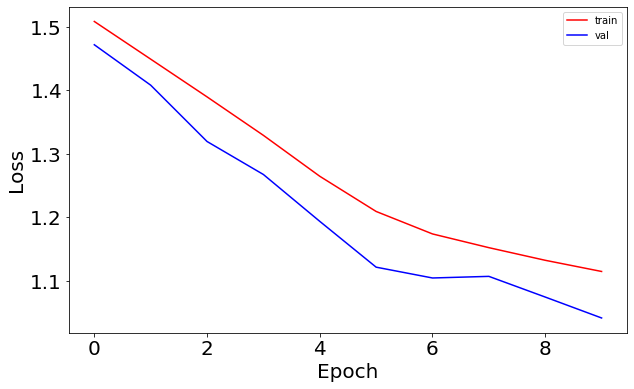

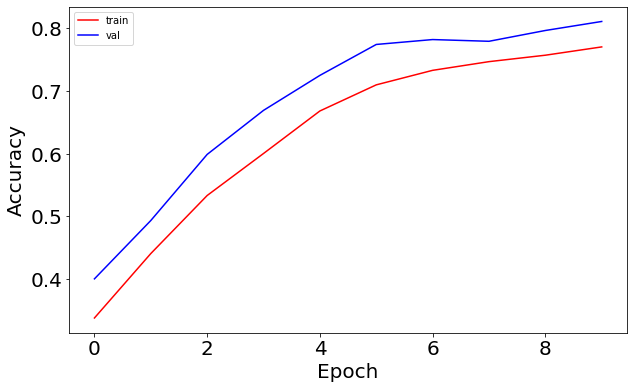

In [34]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)
plt.show()
# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)
plt.show()

In [0]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import RMSprop

In [0]:
# let's create a function that creates the model (required for KerasClassifier) 
# while accepting the hyperparameters we want to tune 
# we also pass some default values such as optimizer='rmsprop'
def create_model(init_mode='uniform'):
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=1024)) 
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(10, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

In [37]:
%%time
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 10

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/10
42000/42000 [==============================] - 2s 43us/step - loss: 2.2959 - acc: 0.1091
Epoch 2/10
42000/42000 [==============================] - 1s 31us/step - loss: 2.1626 - acc: 0.1822
Epoch 3/10
42000/42000 [==============================] - 1s 31us/step - loss: 2.0389 - acc: 0.2501
Epoch 4/10
42000/42000 [==============================] - 1s 31us/step - loss: 1.9582 - acc: 0.2772
Epoch 5/10
42000/42000 [==============================] - 1s 31us/step - loss: 1.8862 - acc: 0.3214
Epoch 6/10
42000/42000 [==============================] - 1s 31us/step - loss: 1.8489 - acc: 0.3391
Epoch 7/10
42000/42000 [==============================] - 1s 32us/step - loss: 1.8106 - acc: 0.3521
Epoch 8/10
42000/42000 [==============================] - 1s 32us/step - loss: 1.7993 - acc: 0.3623
Epoch 9/10
42000/42000 [==============================] - 1s 32us/step - loss: 1.780

In [38]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.5586190475849878 using {'init_mode': 'glorot_normal'}
 mean=0.09905, std=0.003099 using {'init_mode': 'uniform'}
 mean=0.3549, std=0.1661 using {'init_mode': 'lecun_uniform'}
 mean=0.3138, std=0.1873 using {'init_mode': 'normal'}
 mean=0.09981, std=0.002566 using {'init_mode': 'zero'}
 mean=0.5586, std=0.01301 using {'init_mode': 'glorot_normal'}
 mean=0.4593, std=0.08433 using {'init_mode': 'glorot_uniform'}
 mean=0.3722, std=0.1294 using {'init_mode': 'he_normal'}
 mean=0.5265, std=0.0338 using {'init_mode': 'he_uniform'}


Best Accuracy for 0.5486190476417542 using {'init_mode': 'glorot_uniform'}


In [0]:
# repeat some of the initial values here so we make sure they were not changed
input_dim = X_train.shape[1]
num_classes = 10

# let's create a function that creates the model (required for KerasClassifier) 
# while accepting the hyperparameters we want to tune 
# we also pass some default values such as optimizer='rmsprop'
def create_model_2(optimizer='rmsprop', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init, activation=tf.nn.relu))
    model.add(Dense(num_classes, kernel_initializer=init, activation=tf.nn.softmax))

    # compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])

    return model


In [40]:
%%time
# fix random seed for reproducibility (this might work or might not work 
# depending on each library's implenentation)
seed = 7
numpy.random.seed(seed)

# create the sklearn model for the network
model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model_2, verbose=1)

# we choose the initializers that came at the top in our previous cross-validation!!
init_mode = ['glorot_uniform', 'uniform'] 
batches = [128, 512]
epochs = [10, 20]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/10
28000/28000 [==============================] - 1s 53us/step - loss: 2.2998 - acc: 0.1156
Epoch 2/10
28000/28000 [==============================] - 1s 31us/step - loss: 2.1767 - acc: 0.1870
Epoch 3/10
28000/28000 [==============================] - 1s 31us/step - loss: 2.0251 - acc: 0.2715
Epoch 4/10
28000/28000 [==============================] - 1s 31us/step - loss: 1.8940 - acc: 0.3283
Epoch 5/10
28000/28000 [==============================] - 1s 32us/step - loss: 1.8093 - acc: 0.3623
Epoch 6/10
28000/28000 [==============================] - 1s 32us/step - loss: 1.7515 - acc: 0.3826
Epoch 7/10
28000/28000 [==============================] - 1s 31us/step - loss: 1.7121 - acc: 0.3987
Epoch 8/10
28000/28000 [==============================] - 1s 31us/step - loss: 1.6810 - acc: 0.4099
Epoch 9/10
28000/28000 [==============================] - 1s 30us/step - loss: 1.6497 - acc: 0.4247
Epoch 10/10
14000/14000 [==============================] - 0s 23us/step
Epoch 1/10
28000/28000 [====

In [41]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.5424 using {'batch_size': 512, 'epochs': 20, 'init': 'glorot_uniform'}
mean=0.4511, std=0.04618 using {'batch_size': 128, 'epochs': 10, 'init': 'glorot_uniform'}
mean=0.403, std=0.03822 using {'batch_size': 128, 'epochs': 10, 'init': 'uniform'}
mean=0.5375, std=0.02378 using {'batch_size': 128, 'epochs': 20, 'init': 'glorot_uniform'}
mean=0.4701, std=0.08746 using {'batch_size': 128, 'epochs': 20, 'init': 'uniform'}
mean=0.4252, std=0.054 using {'batch_size': 512, 'epochs': 10, 'init': 'glorot_uniform'}
mean=0.3471, std=0.0149 using {'batch_size': 512, 'epochs': 10, 'init': 'uniform'}
mean=0.5424, std=0.02542 using {'batch_size': 512, 'epochs': 20, 'init': 'glorot_uniform'}
mean=0.496, std=0.02985 using {'batch_size': 512, 'epochs': 20, 'init': 'uniform'}


Best Accuracy for 0.539 using {'batch_size': 512, 'epochs': 20,
'init': 'glorot_uniform'}

##Step 19: Best hyperparameters found in the previous step (Step 18)

In [0]:
#Set the best hyperparameters found in the previous step. Check the Network’s accuracy.	7

In [43]:
#Using the best parameters found and 
#Best Accuracy for 0.539 using {'batch_size': 512, 'epochs': 20, 'init': 'glorot_uniform'}

model_final= tf.keras.models.Sequential()
model_final.add(tf.keras.layers.Dense(1024,kernel_initializer='glorot_uniform',activation = 'relu'))
model_final.add(tf.keras.layers.BatchNormalization())
model_final.add(tf.keras.layers.Dense(512,kernel_initializer='glorot_uniform',activation='relu'))
model_final.add(tf.keras.layers.Dense(256,kernel_initializer='glorot_uniform',activation='relu'))
model_final.add(tf.keras.layers.Dense(128,kernel_initializer='glorot_uniform',activation='relu'))
model_final.add(tf.keras.layers.Dense(10,kernel_initializer='glorot_uniform',activation='softmax'))
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_final.compile(optimizer=adam_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model_final.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=512)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 3s 72us/sample - loss: 1.3591 - acc: 0.5573 - val_loss: 1.7116 - val_acc: 0.4925
Epoch 2/20
42000/42000 [==============================] - 2s 40us/sample - loss: 0.8950 - acc: 0.7258 - val_loss: 1.6671 - val_acc: 0.4337
Epoch 3/20
42000/42000 [==============================] - 2s 40us/sample - loss: 0.7866 - acc: 0.7579 - val_loss: 1.9304 - val_acc: 0.4098
Epoch 4/20
42000/42000 [==============================] - 2s 40us/sample - loss: 0.7176 - acc: 0.7806 - val_loss: 1.6770 - val_acc: 0.4781
Epoch 5/20
42000/42000 [==============================] - 2s 39us/sample - loss: 0.6574 - acc: 0.7984 - val_loss: 3.0905 - val_acc: 0.3139
Epoch 6/20
42000/42000 [==============================] - 2s 39us/sample - loss: 0.6342 - acc: 0.8047 - val_loss: 2.1950 - val_acc: 0.4452
Epoch 7/20
42000/42000 [==============================] - 2s 40us/sample - loss: 0.5837 - acc: 0.8229 - val_loss: 2.

In [44]:
%%time
model_final= tf.keras.models.Sequential()
model_final.add(tf.keras.layers.Dense(1024,kernel_initializer='glorot_uniform',activation = 'relu'))
model_final.add(tf.keras.layers.BatchNormalization())
model_final.add(tf.keras.layers.Dense(512,kernel_initializer='glorot_uniform',activation='relu'))
model_final.add(tf.keras.layers.Dense(256,kernel_initializer='glorot_uniform',activation='relu'))
model_final.add(tf.keras.layers.Dense(128,kernel_initializer='glorot_uniform',activation='relu'))
model_final.add(tf.keras.layers.Dense(10,kernel_initializer='glorot_uniform',activation='softmax'))
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_final.compile(optimizer=adam_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
#model_final.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),batch_size=512)
# Fit the model


model_final_history = model_final.fit(X_train, y_train,
                    batch_size=512,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 3s 75us/sample - loss: 1.3443 - acc: 0.5568 - val_loss: 1.8867 - val_acc: 0.3378
Epoch 2/30
42000/42000 [==============================] - 2s 40us/sample - loss: 0.8850 - acc: 0.7279 - val_loss: 1.8282 - val_acc: 0.3609
Epoch 3/30
42000/42000 [==============================] - 2s 39us/sample - loss: 0.7744 - acc: 0.7600 - val_loss: 2.3288 - val_acc: 0.3806
Epoch 4/30
42000/42000 [==============================] - 2s 39us/sample - loss: 0.7080 - acc: 0.7836 - val_loss: 2.9823 - val_acc: 0.2919
Epoch 5/30
42000/42000 [==============================] - 2s 39us/sample - loss: 0.6502 - acc: 0.7995 - val_loss: 2.0682 - val_acc: 0.4134
Epoch 6/30
42000/42000 [==============================] - 2s 39us/sample - loss: 0.6315 - acc: 0.8076 - val_loss: 2.5771 - val_acc: 0.3762
Epoch 7/30
42000/42000 [==============================] - 2s 40us/sample - loss: 0.6042 - acc: 0.8143 - val_loss: 1.

Hence Achieved 92.37%  as maximum accuracy in training set and 81.89% as maximum accuray in validation set using performance tuning. <font color="red"> without CNN</font>.